In [2]:
!pip install pyss3

You should consider upgrading via the 'c:\users\feris\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:

import re
import pandas as pd
from pyss3 import SS3
import pickle
import seaborn as sn

from pyss3.util import Dataset, Evaluation, span
from pyss3.server import Live_Test
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split

# Carga y preprocesamiento de Data

In [2]:
Data=pd.read_csv('Data/Fulldata.csv',engine='python')

In [3]:
Data

,id,label,text
0,0,0.0,just had a real good moment. i missssssssss hi...
1,1,0.0,is reading manga http://plurk.com/p/mzp1e
2,2,0.0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,3,0.0,@lapcat Need to send 'em to my accountant tomo...
4,4,0.0,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...,...
54347,54347,0.0,Donate to the Hawaii Food Bank TODAY!!
54348,54348,0.0,@dmlaenker - dunno who that is. I'm too noobi...
54349,54349,0.0,Was so much fun just treat myself for a change...
54350,54350,0.0,really needed the night out. great tunes! tks ...


In [4]:
X_train, X_test, Y_train, Y_test= train_test_split(Data["text"],Data["label"],test_size=.2, random_state=54)

In [6]:
print("Numero de Datos",Data.shape[0])
print("Numero de tweets con depresion",Data["label"].sum(),"Porcentaje",Data["label"].sum()/Data.shape[0])
print("Numero de tweets sin depresion",Data.shape[0]-Data["label"].sum(),"Porcentaje",(Data.shape[0]-Data["label"].sum())/Data.shape[0])

Numero de Datos 54352
Numero de tweets con depresion 27176.0 Porcentaje 0.5
Numero de tweets sin depresion 27176.0 Porcentaje 0.5


In [7]:
#Para el pre procesamiento se utilizara un simple stemming
stemmer = SnowballStemmer('english')

def stem(match):
    return stemmer.stem(match.group(0))

def my_preprocessing(text):
    return re.sub(r"\w+", stem, text)

In [8]:
x_train_prep = [my_preprocessing(str(X_train.iloc[i])) for i in range(X_train.size)]
x_test_prep = [my_preprocessing(str(X_test.iloc[i])) for i in range(X_test.size)]

# Entrenamiento de Modelo y busqueda de hyperparametros

### Recall =$\frac{TP}{TP+FN}$
### Precision =$\frac{TP}{TP+FP}$
### Accuracy=$\frac{TP+TN}{TP+FN+TN+FP}$
TP= True Positive, 
TN= True Negative,
FP= False Positive, 
FN= False Negative

In [9]:
clf = SS3(s=.2, l=.1, p=.5)
clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Training on '1.0': 100%|██████████| 2/2 [00:09<00:00,  4.53s/it]


Classification: 100%|██████████| 10871/10871 [00:27<00:00, 395.16it/s]


Accuracy was: 0.8645018857510809
Recall : 0.8111975116640746
Precision : 0.9526940639269407


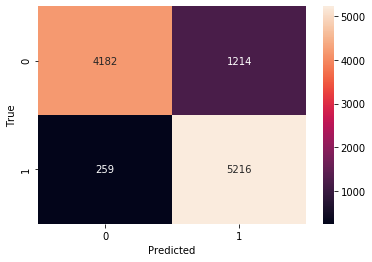

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
clf = SS3(s=.3, l=.5, p=.4)
clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Training on '1.0': 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]


Classification: 100%|██████████| 10871/10871 [00:15<00:00, 684.97it/s]


Accuracy was: 0.9352405482476314
Recall : 0.9268205403471104
Precision : 0.9461187214611873


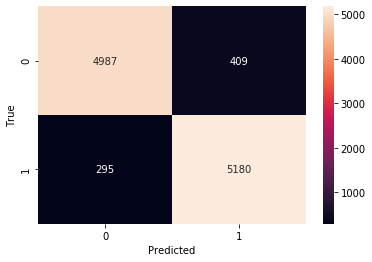

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [14]:
clf = SS3(s=.5, l=.4, p=.6)

clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Training on '1.0': 100%|██████████| 2/2 [00:10<00:00,  5.22s/it]


Classification: 100%|██████████| 10871/10871 [00:12<00:00, 846.54it/s]


Accuracy was: 0.8477600956673719
Recall : 0.9638173870811073
Precision : 0.7249315068493151


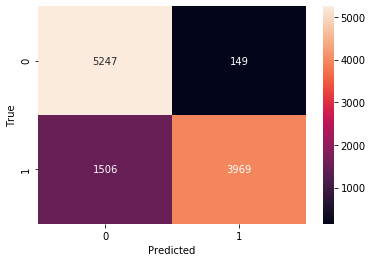

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [16]:
clf = SS3(s=.25, l=.5, p=.5)

clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Training on '1.0': 100%|██████████| 2/2 [00:10<00:00,  5.20s/it]


Classification: 100%|██████████| 10871/10871 [00:17<00:00, 613.48it/s]


Accuracy was: 0.9310091067979027
Recall : 0.8963261197785607
Precision : 0.9758904109589042


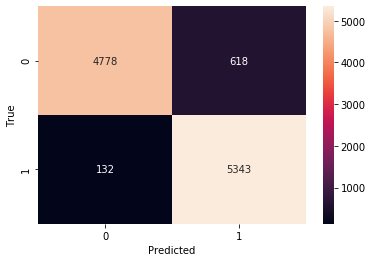

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [18]:
clf = SS3(s=.25, l=.4, p=.55)

clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Training on '1.0': 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]


Classification: 100%|██████████| 10871/10871 [00:19<00:00, 555.30it/s]


Accuracy was: 0.9265936896329684
Recall : 0.8970962812022415
Precision : 0.9649315068493151


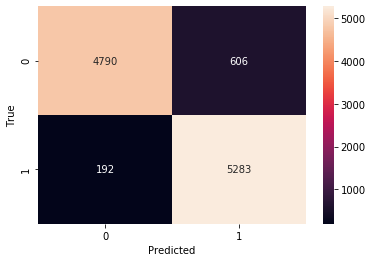

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [20]:
clf = SS3(s=.25, l=.4, p=.1)

clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Training on '1.0': 100%|██████████| 2/2 [00:10<00:00,  5.32s/it]


Classification: 100%|██████████| 10871/10871 [00:17<00:00, 616.59it/s]


Accuracy was: 0.9265936896329684
Recall : 0.8969614666440333
Precision : 0.9651141552511415


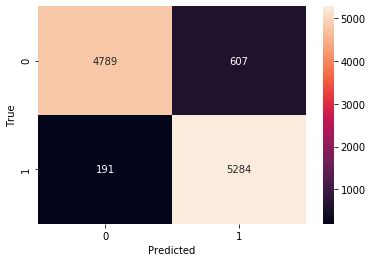

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Se guarda Mejor Modelo

Se eligio este modelo ya que, es el que tiene mejor presición, que es lo que queremos maximizar.

Classification: 100%|██████████| 10871/10871 [00:17<00:00, 612.98it/s]


Accuracy was: 0.9310091067979027
Recall : 0.8963261197785607
Precision : 0.9758904109589042


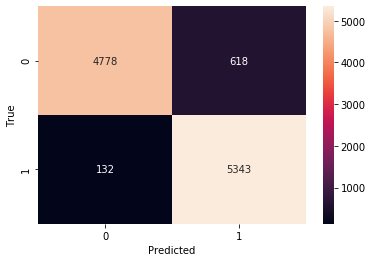

In [22]:
clf = SS3(s=.25, l=.5, p=.5)
clf.train(x_train_prep, Y_train, n_grams=3, prep=False)
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [25]:
x=["I am very sad today"]
print(x)
#Si tiene depresión marcara un 1
clf.predict(x)

Classification: 100%|██████████| 1/1 [00:00<00:00, 1000.55it/s]

['I am very sad today']


[1.0]

In [26]:

x=["Today is a great day"]
print(x)
#Si tiene depresión marcara un 1
clf.predict(x)

Classification: 100%|██████████| 1/1 [00:00<00:00, 501.05it/s]

['Today is a great dat']


[0.0]

In [35]:
x=["I dont like my life"]
print(x)
#Si tiene depresión marcara un 1
clf.predict(x)

Classification: 100%|██████████| 1/1 [00:00<00:00, 45.58it/s]

['I dont like my life']


[1.0]

In [36]:
save_classifier = open("Models/SS3.pickle","wb")
pickle.dump(clf, save_classifier)
save_classifier.close()